# **LAB 1 - PART 1**
Data exploration, cleaning and preprocessing

### Import tools

In [573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import zscore
#ctl+shift+p : Select Interpreter > select ML_Environment ; (conda activate ML_Environment)

## **1. Data Exploration**
Read the Data_example.csv files
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.read_csv()`


<details>
<summary>
<font size="3" color="green">
<b>more hints</b>
</summary>
</font>

How was the file encoded?🤔
</details>
</details>

In [574]:
### START CODE HERE ###
df = pd.read_csv("Data_example.csv", encoding="cp874") #"utf-16" or "cp874" (Windows-874)
### END CODE HERE ###

Visulize the dataframe in cell below.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output
</font>
</summary>

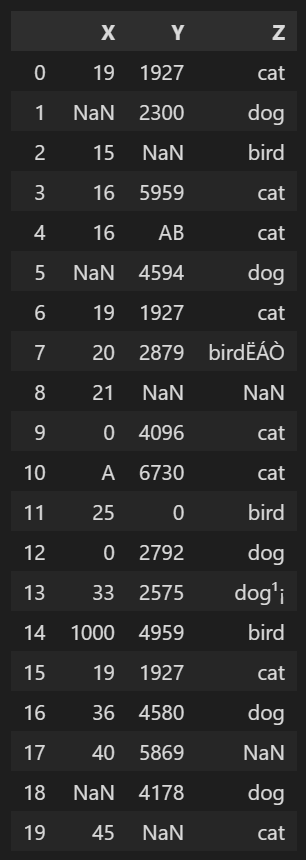

</details>

In [575]:
### START CODE HERE ###
df
### END CODE HERE ###

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,birdหมา
8,21,NaN,NaN
9,0,4096,cat


View the data frame information
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

-  `.info()`
</details>


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       20 non-null     Int64  
 1   Y       20 non-null     float64
 2   Z       20 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 628.0 bytes
```

</details>

In [576]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     object
 1   Y       17 non-null     object
 2   Z       18 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


## **2. Data Cleaning**


### Replace
Use the `replace()` method to remove non-ASCII characters from specific columns in the DataFrame. Then visualize the DataFrame.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Use regular expression.
</details>




<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

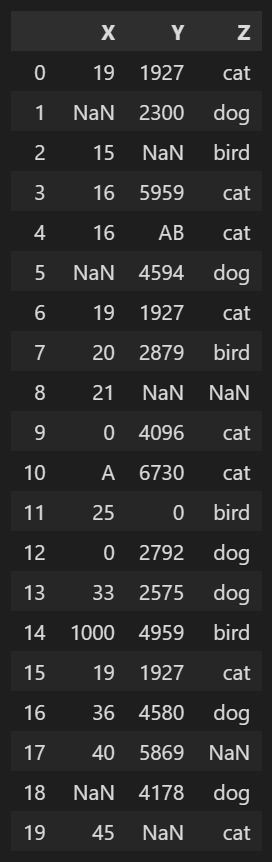

</details>

In [577]:
### START CODE HERE ###
'''
df.replace(to_replace=r'^ba.$', value='new', regex=True)
Returns:
        Object after replacement.

The \W special character is equivalent to [^A-Za-z0-9_]
'''
df.replace(to_replace=r'[^a-zA-Z0-9]', value='', regex=True, inplace=True)
### END CODE HERE ###
df

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,bird
8,21,NaN,NaN
9,0,4096,cat


### Convert Data Types
Converting the data types of specific columns in a pandas DataFrame.

| Column | Data Type |
| ------ | --------- |
| X      | int64     |
| Y      | float64   |
| Z      | string    |

</br>
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.to_numeric()` and `.astype()` might be useful here.
</details>


In [578]:
### START CODE HERE ###
'''
Numeric :
pd.to_numeric(df['X']) : convert to float64
pd.to_numeric(df['X']).astype('Int64') : convert to Int64

Not Numeric :
df['Z'].astype("string") : convert to string

Adding : 
if in numeric have a-zA-Z (Unable to parse string "A")

errors='coerce' : change non-numeric to NaN (A->NaN)
errors='ignore' : not change non-numeric (A->A)

df.dtypes
'''
df['X'] = pd.to_numeric(df['X'], errors='coerce').astype('Int64')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Z'] = df['Z'].astype("string")

print(df.dtypes)
### END CODE HERE ###

X             Int64
Y           float64
Z    string[python]
dtype: object


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       16 non-null     Int64  
 1   Y       16 non-null     float64
 2   Z       18 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 628.0 bytes

```

</details>

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       16 non-null     Int64  
 1   Y       16 non-null     float64
 2   Z       18 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 628.0 bytes



### Drop the duplicates
Drop the duplicates rows using 
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.drop_duplicates(inplace=True)`
</details>

In [580]:
### START CODE HERE ###
'''
DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)
    subset : part of column
    keep : which row do you want to keep {‘first’, ‘last’, False}, default ‘first’
    inplace : True>place in original DataFrame, False>create a new Dataframe {bool, default False}
    ignore_index : True>reordering labeled column (0-9), Flase>not reordering labeled column (0-4,6-9) {bool, default False}
'''
df.drop_duplicates(inplace=True)
df
### END CODE HERE ###

,X,Y,Z
0,19,1927.0,cat
1,<NA>,2300.0,dog
2,15,NaN,bird
3,16,5959.0,cat
4,16,NaN,cat
5,<NA>,4594.0,dog
7,20,2879.0,bird
8,21,NaN,<NA>
9,0,4096.0,cat
10,<NA>,6730.0,cat


The `df.describe()` output includes the following statistics for each column:
- count: Number of non-null values
- mean: Mean (average) value
- std: Standard deviation, which measures the amount of variation or dispersion
- min: Minimum value
- 25%: First quartile (25th percentile)
- 50%: Median (50th percentile)
- 75%: Third quartile (75th percentile)
- max: Maximum value

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|       |      X |          Y |
|-------|--------|------------|
| count | 14.0   | 14.00000   |
| mean  | 91.857 | 3817.00000 |
| std   | 261.717| 1837.61074 |
| min   | 0.0    | 0.00000    |
| 25%   | 16.0   | 2629.25000 |
| 50%   | 20.5   | 4137.00000 |
| 75%   | 35.25  | 4867.75000 |
| max   | 1000.0 | 6730.00000 |


</details>

In [581]:
df.describe()

,X,Y
count,14.0,14.00000
mean,91.857143,3817.00000
std,261.717069,1837.61074
min,0.0,0.00000
25%,16.0,2629.25000
50%,20.5,4137.00000
75%,35.25,4867.75000
max,1000.0,6730.00000


### Drop NAN

The `df.dropna()` method will return a new DataFrame with rows that do not contain any missing values. It removes any row where at least one element is missing. By default, this operation is performed on all columns. </br></br>
In the cell below, you will drop rows that have ***2 NaN values***.

In [582]:
### START CODE HERE ###
df.dropna(thresh=2, inplace=True)
### END CODE HERE ###
df

,X,Y,Z
0,19,1927.0,cat
1,<NA>,2300.0,dog
2,15,NaN,bird
3,16,5959.0,cat
4,16,NaN,cat
5,<NA>,4594.0,dog
7,20,2879.0,bird
9,0,4096.0,cat
10,<NA>,6730.0,cat
11,25,0.0,bird


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Index: 17 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       13 non-null     Int64  
 1   Y       14 non-null     float64
 2   Z       16 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 561.0 bytes

```

</details>

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       13 non-null     Int64  
 1   Y       14 non-null     float64
 2   Z       16 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 561.0 bytes


### Fill NA
Before proceeding with filling missing values, it is crucial to comprehend the significance of each numerical column in the dataset. This understanding will guide the appropriate method for handling missing data in a way that aligns with the context and characteristics of each column.

Replace the NA with specific values or conditions.

| Column | Condition |
| ------ | --------- |
| X      | mean or median    |
| Y      | mean or median    |
| Z      | previous row    |

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Please explore the statistical values for each column (mean, median, min, max, etc.).
- `.fillna()`
</details> 

In [584]:
### START CODE HERE ###
'''
df.mean(), df.median() : not use <Na>, NaN to calculate
df.ffill() : The ffill() method replaces the NULL values with the value from the previous row

print(df['X'].mean(), df['X'].median()) #97.3076923076923 20.0
print(df['Y'].mean(), df['Y'].median()) #3817.0 4137.0

ถ้า mean ใกล้เคียง median : ใช้ mean เนื่องจากไม่เบ้
ถ้า mean ไม่ใกล้เคียง median : ใช้ median เนื่องจากมีการเบ้
'''

df.describe()
df['X'] = df['X'].fillna(value=df['X'].median(numeric_only=True))
df['Y'] = df['Y'].fillna(value=df['Y'].mean(numeric_only=True))
df['Z'] = df['Z'].ffill()
'''
zscore(df, ddof=0) : คิดได้เฉพาะ type : float64
'''
# zscore_df =  df.copy()
# zscore_df['X'] = pd.to_numeric(zscore_df['X'], errors='coerce').astype('float64')
# zscore_df['X_zscore'] = zscore(zscore_df['X'], ddof=0)
# zscore_df['Y_zscore'] = zscore(zscore_df['Y'], ddof=0)
# s = pd.DataFrame({'X':zscore_df['X_zscore'], 'Y':zscore_df['Y_zscore']})
# s.plot.kde(subplots=True, sharex=False)

df
### END CODE HERE ###



,X,Y,Z
0,19,1927.0,cat
1,20,2300.0,dog
2,15,3817.0,bird
3,16,5959.0,cat
4,16,3817.0,cat
5,20,4594.0,dog
7,20,2879.0,bird
9,0,4096.0,cat
10,20,6730.0,cat
11,25,0.0,bird


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Index: 17 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       17 non-null     Int64  
 1   Y       17 non-null     float64
 2   Z       17 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 561.0 bytes

```

</details>

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       17 non-null     Int64  
 1   Y       17 non-null     float64
 2   Z       17 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 561.0 bytes



<font size="3" color="Red">
<b>Which fill NA method have you selected, and why? </br>Please explain in the cell below.</b>
</font>

In [586]:
"""

Type your answer here.

ถ้า mean ใกล้เคียง median : ใช้ mean เนื่องจากไม่เบ้
ถ้า mean ไม่ใกล้เคียง median : ใช้ median เนื่องจากมีการเบ้

"""

'\n\nType your answer here.\n\nถ้า mean ใกล้เคียง median : ใช้ mean เนื่องจากไม่เบ้\nถ้า mean ไม่ใกล้เคียง median : ใช้ median เนื่องจากมีการเบ้\n\n'

## **3. Data Transform**
**NOTE** : This section will demonstrate the difference between Min-Max scaling and Standard scaling before and after removing outliers.

Show the boxplot of original dataframe.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

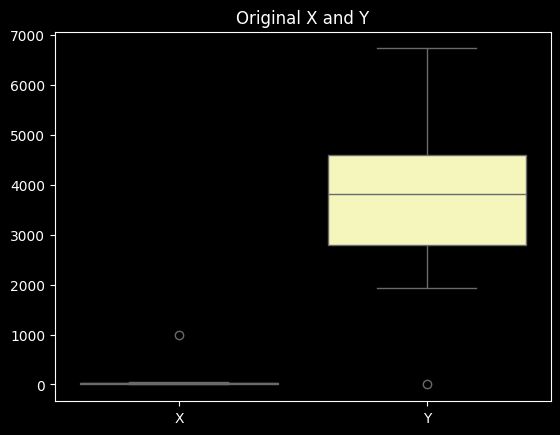

</details>

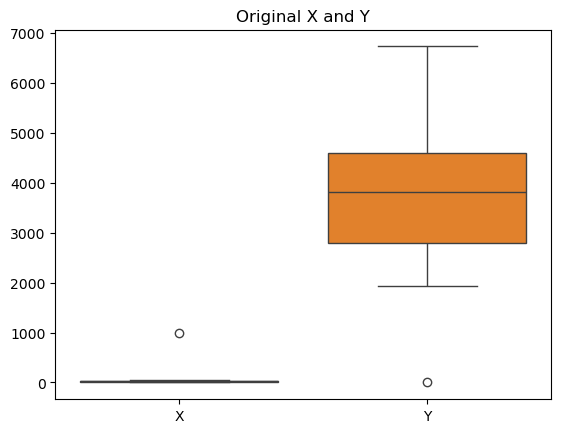

In [587]:
### START CODE HERE ###
'''
sns.boxplot(df) : จะเลือกเฉพาะ numeric มา plot
'''
sns.boxplot(df)
plt.title('Original X and Y')
plt.show()
### END CODE HERE ###

### Min-Max Scaling

Scaling columns X and Y using Min-Max scaling and placing the results in new columns of `tmpmm_df`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 

In [588]:
tmpmm_df = df.copy()
'''
df['X'] ต่างจาก df[['X']]
ตรงที่ :  df['X'] > แทน series ของข้อมูล มีลักษณะเป็น 1 มิติ (1D) array (Series Object) -เฉพาะข้อมูล
        df[['X']] > แทน DataFrame ที่มี 1 column มีลักษณะเป็น 2 มิติ (2D) array (DataFrame object) -ข้อมูล+หัวตาราง
'''
### START CODE HERE ###
minmax_scaler = preprocessing.MinMaxScaler()

''' 
np.array([[0.2, 0.4],
          [0.6, 0.8],
          [0.1, 0.3]])
get column of np.array :
    np.array[:, 0] -> [0.2 0.6 0.1]
get row of np.array :
    np.array[1, :] -> [0.6 0.8]

loc[row_indexer,col_indexer] : Access a group of rows and columns by label(s) or a boolean array.
    เนื่องจาก Pandas ไม่แน่ใจว่า df_scaler[:, 0] เป็น view หรือ copy ของ DataFrame
    การใช้ .loc[] จะบอก Pandas โดยตรงว่าคุณกำลังให้ค่าใน DataFrame และไม่มีข้อสงสัยว่าคุณจะกำลังใช้ "slice" หรือ "view" ของข้อมูล
    โดย df.loc[:, 'X_minmax'] หมายถึง เข้าถึง row ทั้งหมดของ column X_minmax
'''

tmpmm_df_minmax = minmax_scaler.fit_transform(tmpmm_df[['X', 'Y']])
tmpmm_df.loc[:, 'X_minmax'] = tmpmm_df_minmax[:, 0] #get all value in first column
tmpmm_df.loc[:, 'Y_minmax'] = tmpmm_df_minmax[:, 1] #get all value in second column

''' 
flatten() : Return a copy of the array collapsed into one dimension. {[[1,2], [3,4]] -> [1, 2, 3, 4]}
'''
# tmpmm_df_X_minmax = minmax_scaler.fit_transform(tmpmm_df[['X']])
# tmpmm_df_Y_minmax = minmax_scaler.fit_transform(tmpmm_df[['Y']])
# tmpmm_df['X_minmax'] = tmpmm_df_X_minmax.flatten() 
# tmpmm_df['Y_minmax'] = tmpmm_df_Y_minmax.flatten()

# ### END CODE HERE ###

# Print the scaled values
tmpmm_df

,X,Y,Z,X_minmax,Y_minmax
0,19,1927.0,cat,0.019,0.286330
1,20,2300.0,dog,0.020,0.341753
2,15,3817.0,bird,0.015,0.567162
3,16,5959.0,cat,0.016,0.885438
4,16,3817.0,cat,0.016,0.567162
5,20,4594.0,dog,0.020,0.682615
7,20,2879.0,bird,0.020,0.427786
9,0,4096.0,cat,0.000,0.608618
10,20,6730.0,cat,0.020,1.000000
11,25,0.0,bird,0.025,0.000000


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

|         | X            | Y            | X_minmax     | Y_minmax     |
|---------|--------------|--------------|--------------|--------------|
| count   | 17.0         | 17.000000    | 17.000000    | 17.000000    |
| mean    | 79.117647    | 3817.000000  | 0.079118     | 0.567162     |
| std     | 237.607839   | 1656.399937  | 0.237608     | 0.246122     |
| min     | 0.0          | 0.000000     | 0.000000     | 0.000000     |
| 25%     | 16.0         | 2792.000000  | 0.016000     | 0.414859     |
| 50%     | 20.0         | 3817.000000  | 0.020000     | 0.567162     |
| 75%     | 33.0         | 4594.000000  | 0.033000     | 0.682615     |
| max     | 1000.0       | 6730.000000  | 1.000000     | 1.000000     |

</details>

In [589]:
tmpmm_df.describe()

,X,Y,X_minmax,Y_minmax
count,17.0,17.000000,17.000000,17.000000
mean,79.117647,3817.000000,0.079118,0.567162
std,237.607839,1656.399937,0.237608,0.246122
min,0.0,0.000000,0.000000,0.000000
25%,16.0,2792.000000,0.016000,0.414859
50%,20.0,3817.000000,0.020000,0.567162
75%,33.0,4594.000000,0.033000,0.682615
max,1000.0,6730.000000,1.000000,1.000000


Show the boxplot of Min-Max scaled dataframe.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

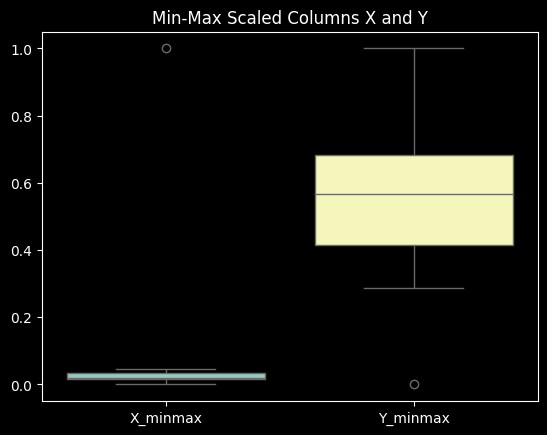

</details>

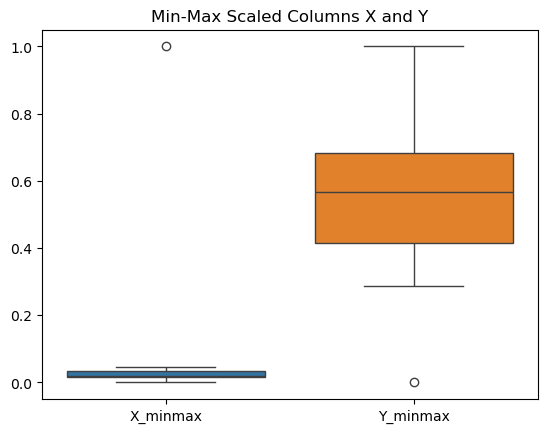

In [590]:
### START CODE HERE ###
sns.boxplot(tmpmm_df[['X_minmax','Y_minmax']])
plt.title('Min-Max Scaled Columns X and Y')
plt.show()
### END CODE HERE ###

#### Remove outliers 
Remove outliers from the DataFrame `tmpmm_df2` based on the boxplot method. The Interquartile Range (IQR) is used to define the range within which data points are considered normal, and points outside this range are treated as potential outliers.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

1. Calculating Quartiles and IQR:

>- $Q_{1_X}, Q_{3_X}, IQR_X$ : Calculate the first quartile, third quartile, and IQR for column 'X'.
>- $Q_{1_Y}, Q_{3_Y}, IQR_Y$ : Calculate the first quartile, third quartile, and IQR for column 'Y'.
2. Defining Lower and Upper Bounds:

>- lower_bound_X, upper_bound_X: Define the lower and upper bounds for column 'X' using the $1.5 * IQR$ rule.
>- lower_bound_Y, upper_bound_Y: Define the lower and upper bounds for column 'Y' using the $1.5 * IQR$ rule.
3. Creating Outlier Mask:

>- outlier_mask: Create a boolean mask to identify rows containing outliers. Rows where values fall outside the defined bounds for either 'X' or 'Y' are marked as outliers.
4. Removing Outliers:
>- Update `tmpmm_df2` by keeping only the rows where the values are not marked as outliers according to the mask.
</details> 

In [591]:
tmpmm_df2 = tmpmm_df.copy()
### START CODE HERE ###
Q1_X = tmpmm_df2['X_minmax'].quantile(q=0.25)
Q3_X = tmpmm_df2['X_minmax'].quantile(q=0.75)
IQR_X = Q3_X-Q1_X
Q1_Y = tmpmm_df2['Y_minmax'].quantile(q=0.25)
Q3_Y = tmpmm_df2['Y_minmax'].quantile(q=0.75)
IQR_Y = Q3_Y-Q1_Y

lower_bound_X = Q1_X-(1.5*IQR_X)
upper_bound_X = Q3_X+(1.5*IQR_X)

lower_bound_Y = Q1_Y-(1.5*IQR_Y)
upper_bound_Y = Q3_Y+(1.5*IQR_Y)

outlier_mask = (
    (tmpmm_df2['X_minmax'] < lower_bound_X) | (tmpmm_df2['X_minmax'] > upper_bound_X) |
    (tmpmm_df2['Y_minmax'] < lower_bound_Y) | (tmpmm_df2['Y_minmax'] > upper_bound_Y)
)

tmpmm_df2 = tmpmm_df2[~outlier_mask]
### END CODE HERE ###
tmpmm_df2

,X,Y,Z,X_minmax,Y_minmax
0,19,1927.0,cat,0.019,0.286330
1,20,2300.0,dog,0.020,0.341753
2,15,3817.0,bird,0.015,0.567162
3,16,5959.0,cat,0.016,0.885438
4,16,3817.0,cat,0.016,0.567162
5,20,4594.0,dog,0.020,0.682615
7,20,2879.0,bird,0.020,0.427786
9,0,4096.0,cat,0.000,0.608618
10,20,6730.0,cat,0.020,1.000000
12,0,2792.0,dog,0.000,0.414859


After removing outliers, scale columns X and Y using Min-Max scaling, and place the results in new columns of `tmpmm_df2`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 

In [592]:
### START CODE HERE ###
minmax_scaler = preprocessing.MinMaxScaler()
tmpmm_df_minmax = minmax_scaler.fit_transform(tmpmm_df2[['X', 'Y']])
tmpmm_df2.loc[:, 'X_minmax'] = tmpmm_df_minmax[:, 0] #get all value in first column
tmpmm_df2.loc[:, 'Y_minmax'] = tmpmm_df_minmax[:, 1] #get all value in second column
### END CODE HERE ###
tmpmm_df2

# zscore_df =  tmpmm_df2.copy()
# zscore_df['X'] = pd.to_numeric(zscore_df['X'], errors='coerce').astype('float64')
# zscore_df['X_zscore'] = zscore(zscore_df['X'], ddof=0)
# zscore_df['Y_zscore'] = zscore(zscore_df['Y'], ddof=0)
# s = pd.DataFrame({'X':zscore_df['X_zscore'], 'Y':zscore_df['Y_zscore']})
# s.plot.kde(subplots=True, sharex=False)

,X,Y,Z,X_minmax,Y_minmax
0,19,1927.0,cat,0.422222,0.000000
1,20,2300.0,dog,0.444444,0.077660
2,15,3817.0,bird,0.333333,0.393504
3,16,5959.0,cat,0.355556,0.839475
4,16,3817.0,cat,0.355556,0.393504
5,20,4594.0,dog,0.444444,0.555278
7,20,2879.0,bird,0.444444,0.198209
9,0,4096.0,cat,0.000000,0.451593
10,20,6730.0,cat,0.444444,1.000000
12,0,2792.0,dog,0.000000,0.180096


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

|         | X            | Y            | X_minmax     | Y_minmax     |
|---------|--------------|--------------|--------------|--------------|
| count   | 15.0         | 15.000000    | 15.000000    | 15.000000    |
| mean    | 21.333333    | 3995.333333  | 0.474074     | 0.430634     |
| std     | 12.76528     | 1402.749273  | 0.283673     | 0.292057     |
| min     | 0.0          | 1927.000000  | 0.000000     | 0.000000     |
| 25%     | 16.0         | 2835.500000  | 0.355556     | 0.189153     |
| 50%     | 20.0         | 3817.000000  | 0.444444     | 0.393504     |
| 75%     | 26.5         | 4587.000000  | 0.588889     | 0.553821     |
| max     | 45.0         | 6730.000000  | 1.000000     | 1.000000     |
</details>

In [593]:
tmpmm_df2.describe()

,X,Y,X_minmax,Y_minmax
count,15.0,15.000000,15.000000,15.000000
mean,21.333333,3995.333333,0.474074,0.430634
std,12.76528,1402.749273,0.283673,0.292057
min,0.0,1927.000000,0.000000,0.000000
25%,16.0,2835.500000,0.355556,0.189153
50%,20.0,3817.000000,0.444444,0.393504
75%,26.5,4587.000000,0.588889,0.553821
max,45.0,6730.000000,1.000000,1.000000


Show the removed outliers boxplot of Min-Max scaled dataframe.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

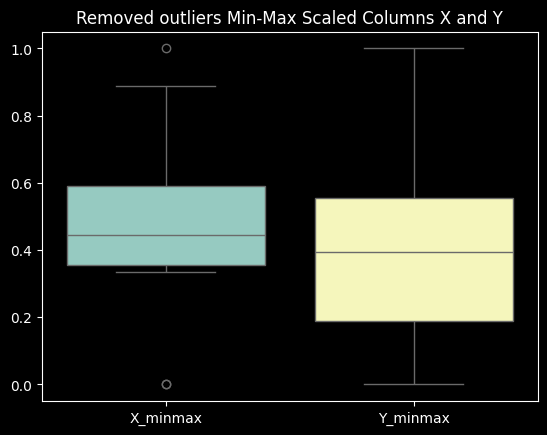
</details>

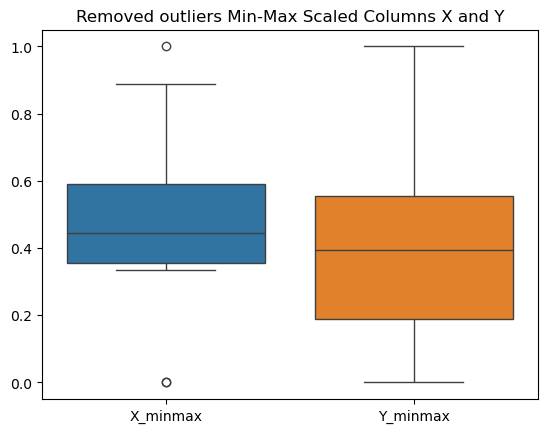

In [594]:
### START CODE HERE ###
sns.boxplot(tmpmm_df2[['X_minmax','Y_minmax']])
plt.title('Removed outliers Min-Max Scaled Columns X and Y')
plt.show()
### END CODE HERE ###

### Standardize Scaling

Scaling columns X and Y using Standardize scaling and placing the results in new columns of `tmpstd_df`.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 

In [595]:
tmpstd_df = df.copy()
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()

tmpstd_df_scaler = standardize_scaler.fit_transform(tmpstd_df[['X','Y']])
tmpstd_df.loc[:, 'X_standardize'] = tmpstd_df_scaler[:,0]
tmpstd_df.loc[:, 'Y_standardize'] = tmpstd_df_scaler[:,1]

### END CODE HERE ###
tmpstd_df

,X,Y,Z,X_standardize,Y_standardize
0,19,1927.0,cat,-0.260799,-1.176146
1,20,2300.0,dog,-0.256461,-0.944028
2,15,3817.0,bird,-0.278151,0.000000
3,16,5959.0,cat,-0.273813,1.332965
4,16,3817.0,cat,-0.273813,0.000000
5,20,4594.0,dog,-0.256461,0.483527
7,20,2879.0,bird,-0.256461,-0.583717
9,0,4096.0,cat,-0.343224,0.173621
10,20,6730.0,cat,-0.256461,1.812758
11,25,0.0,bird,-0.234770,-2.375316


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

|         | X            | Y            | X_standardize   | Y_standardize  |
|---------|--------------|--------------|-----------------|-----------------|
| count   | 17.0         | 17.000000    | 1.700000e+01    | 17.000000      |
| mean    | 79.117647    | 3817.000000  | -2.612289e-17   | 0.000000       |
| std     | 237.607839   | 1656.399937  | 1.030776e+00    | 1.030776       |
| min     | 0.0          | 0.000000     | -3.432235e-01   | -2.375316      |
| 25%     | 16.0         | 2792.000000  | -2.738133e-01   | -0.637857      |
| 50%     | 20.0         | 3817.000000  | -2.564607e-01   | 0.000000       |
| 75%     | 33.0         | 4594.000000  | -2.000649e-01   | 0.483527       |
| max     | 1000.0       | 6730.000000  | 3.994918e+00    | 1.812758       |

</details>

In [596]:
tmpstd_df.describe()

,X,Y,X_standardize,Y_standardize
count,17.0,17.000000,1.700000e+01,17.000000
mean,79.117647,3817.000000,-2.612289e-17,0.000000
std,237.607839,1656.399937,1.030776e+00,1.030776
min,0.0,0.000000,-3.432235e-01,-2.375316
25%,16.0,2792.000000,-2.738133e-01,-0.637857
50%,20.0,3817.000000,-2.564607e-01,0.000000
75%,33.0,4594.000000,-2.000649e-01,0.483527
max,1000.0,6730.000000,3.994918e+00,1.812758


Show the removed outliers boxplot of Min-Max scaled dataframe.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

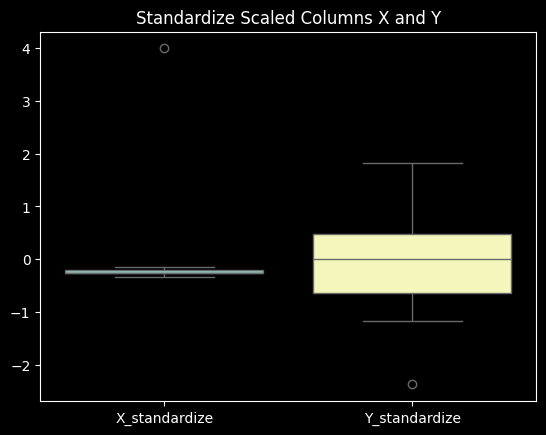
</details>

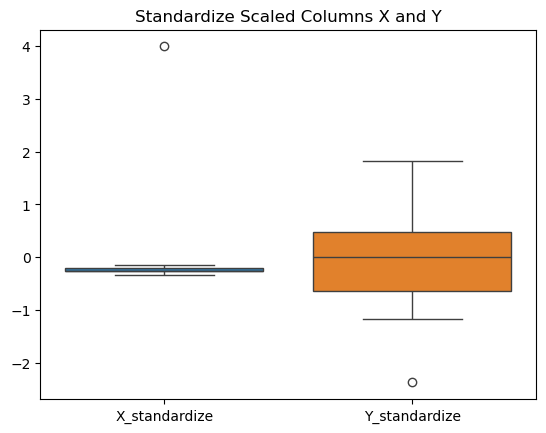

In [597]:
### START CODE HERE ###
sns.boxplot(tmpstd_df[['X_standardize','Y_standardize']])
plt.title('Standardize Scaled Columns X and Y')
plt.show()
### END CODE HERE ###

#### Remove outliers 
from the DataFrame `tmpstd_df2` based on the boxplot method. The Interquartile Range (IQR) is used to define the range within which data points are considered normal, and points outside this range are treated as potential outliers.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Similar with the previous.
</details> 

In [598]:
tmpstd_df2 = tmpstd_df.copy()
### START CODE HERE ###
Q1_X = tmpstd_df2['X_standardize'].quantile(0.25)
Q3_X = tmpstd_df2['X_standardize'].quantile(0.75)
IQR_X = Q3_X-Q1_X

Q1_Y = tmpstd_df2['Y_standardize'].quantile(0.25)
Q3_Y = tmpstd_df2['Y_standardize'].quantile(0.75)
IQR_Y = Q3_Y-Q1_Y

lower_bound_X = Q1_X-(1.5*IQR_X)
upper_bound_X = Q3_X+(1.5*IQR_X)

lower_bound_Y = Q1_Y-(1.5*IQR_Y)
upper_bound_Y = Q3_Y+(1.5*IQR_Y)

outlier_mask = (
    (tmpstd_df2['X_standardize'] < lower_bound_X) | (tmpstd_df2['X_standardize'] > upper_bound_X) |
    (tmpstd_df2['Y_standardize'] < lower_bound_Y) | (tmpstd_df2['Y_standardize'] > upper_bound_Y)
)

tmpstd_df2 = tmpstd_df2[~outlier_mask]
### END CODE HERE ###
tmpstd_df2

,X,Y,Z,X_standardize,Y_standardize
0,19,1927.0,cat,-0.260799,-1.176146
1,20,2300.0,dog,-0.256461,-0.944028
2,15,3817.0,bird,-0.278151,0.000000
3,16,5959.0,cat,-0.273813,1.332965
4,16,3817.0,cat,-0.273813,0.000000
5,20,4594.0,dog,-0.256461,0.483527
7,20,2879.0,bird,-0.256461,-0.583717
9,0,4096.0,cat,-0.343224,0.173621
10,20,6730.0,cat,-0.256461,1.812758
12,0,2792.0,dog,-0.343224,-0.637857


After removing outliers, scale columns X and Y using Standardize scaling, and place the results in new columns of `tmpstd_df2`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 

In [599]:
### STAET CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
tmpstd_df2_scaler = standardize_scaler.fit_transform(tmpstd_df2[['X', 'Y']])
tmpstd_df2.loc[:, 'X_standardize'] = tmpstd_df2_scaler[:,0]
tmpstd_df2.loc[:, 'Y_standardize'] = tmpstd_df2_scaler[:,1]

### END CODE HERE ###
tmpstd_df2

,X,Y,Z,X_standardize,Y_standardize
0,19,1927.0,cat,-0.189203,-1.526237
1,20,2300.0,dog,-0.108116,-1.250998
2,15,3817.0,bird,-0.513551,-0.131593
3,16,5959.0,cat,-0.432464,1.449003
4,16,3817.0,cat,-0.432464,-0.131593
5,20,4594.0,dog,-0.108116,0.441760
7,20,2879.0,bird,-0.108116,-0.823750
9,0,4096.0,cat,-1.729856,0.074283
10,20,6730.0,cat,-0.108116,2.017929
12,0,2792.0,dog,-1.729856,-0.887948


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

|         | X            | Y            | X_standardize   | Y_standardize  |
|---------|--------------|--------------|-----------------|-----------------|
| count   | 15.0         | 15.000000    | 1.500000e+01    | 1.500000e+01    |
| mean    | 21.333333    | 3995.333333  | 1.332268e-16   | -8.326673e-17  |
| std     | 12.76528     | 1402.749273  | 1.035098e+00   | 1.035098e+00   |
| min     | 0.0          | 1927.000000  | -1.729856e+00  | -1.526237e+00  |
| 25%     | 16.0         | 2835.500000  | -4.324640e-01  | -8.558490e-01  |
| 50%     | 20.0         | 3817.000000  | -1.081160e-01  | -1.315934e-01  |
| 75%     | 26.5         | 4587.000000  | 4.189495e-01   | 4.365949e-01   |
| max     | 45.0         | 6730.000000  | 1.919059e+00   | 2.017929e+00   |

</details>

In [600]:
tmpstd_df2.describe()

,X,Y,X_standardize,Y_standardize
count,15.0,15.000000,1.500000e+01,1.500000e+01
mean,21.333333,3995.333333,1.332268e-16,-8.326673e-17
std,12.76528,1402.749273,1.035098e+00,1.035098e+00
min,0.0,1927.000000,-1.729856e+00,-1.526237e+00
25%,16.0,2835.500000,-4.324640e-01,-8.558490e-01
50%,20.0,3817.000000,-1.081160e-01,-1.315934e-01
75%,26.5,4587.000000,4.189495e-01,4.365949e-01
max,45.0,6730.000000,1.919059e+00,2.017929e+00


Show the removed outliers boxplot of Standardize scaled dataframe.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

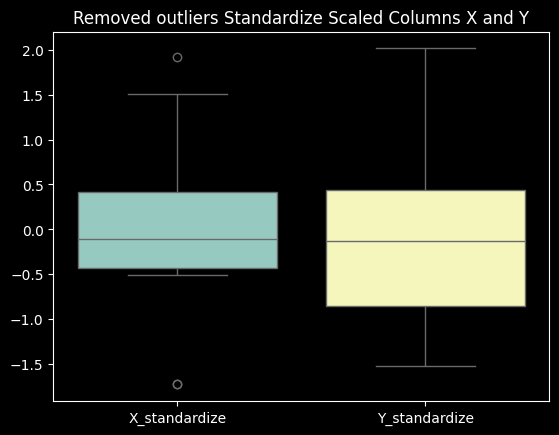
</details>

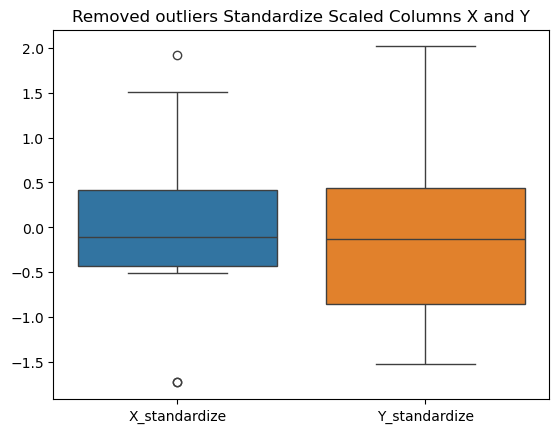

In [601]:
### START CODE HERE ###
sns.boxplot(tmpstd_df2[['X_standardize', 'Y_standardize']])
plt.title('Removed outliers Standardize Scaled Columns X and Y')
plt.show()
### END CODE HERE ###

## **4. Data Category Label**

**NOTE** : Please select one of the Scaling type from the previous section.

In [602]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
df_scaler = standardize_scaler.fit_transform(df[['X', 'Y']])
df.loc[:, 'X'] = df_scaler[:,0]
df.loc[:, 'Y'] = df_scaler[:,1]

#remove outliers by using standardize_scaler can use <-3std or >3std 
X_std = df['X'].std()
Y_std = df['Y'].std()
outlier_mask = (
    (df['X'] < (-3)*X_std) | (df['X'] > 3*X_std) |
    (df['Y'] < (-3)*Y_std) | (df['Y'] > 3*Y_std)
)

df = df[~outlier_mask]

#remove outliers by using standardize_scaler
# Q1_X = df['X'].quantile(0.25)
# Q3_X = df['X'].quantile(0.75)
# IQR_X = Q3_X-Q1_X

# Q1_Y = df['Y'].quantile(0.25)
# Q3_Y = df['Y'].quantile(0.75)
# IQR_Y = Q3_Y-Q1_Y

# lower_bound_X = Q1_X-(1.5*IQR_X)
# upper_bound_X = Q3_X+(1.5*IQR_X)

# lower_bound_Y = Q1_Y-(1.5*IQR_Y)
# upper_bound_Y = Q3_Y+(1.5*IQR_Y)

# outlier_mask = (
#     (df['X'] < lower_bound_X) | (df['X'] > upper_bound_X) |
#     (df['Y'] < lower_bound_Y) | (df['Y'] > upper_bound_Y)
# )

# df = df[~outlier_mask]

#do strandardie again
df_scaler = standardize_scaler.fit_transform(df[['X', 'Y']])
df.loc[:, 'X'] = df_scaler[:,0]
df.loc[:, 'Y'] = df_scaler[:,1]

### END CODE HERE ###
df

,X,Y,Z
0,-0.214010,-1.115688,cat
1,-0.130494,-0.886860,dog
2,-0.548073,0.043787,bird
3,-0.464557,1.357859,cat
4,-0.464557,0.043787,cat
5,-0.130494,0.520460,dog
7,-0.130494,-0.531656,bird
9,-1.800812,0.214948,cat
10,-0.130494,1.830851,cat
11,0.287086,-2.297862,bird


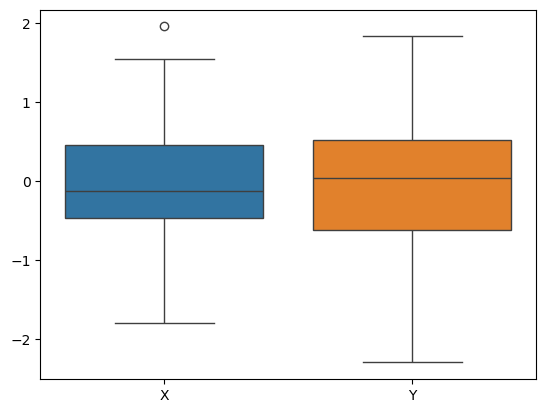

In [603]:
sns.boxplot(data=df[['X', 'Y']])
plt.show()

Reset DataFrame index.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

|   | X        | Y        | Z    |
|---|----------|----------|------|
| 0 | 0.422222 | 0.000000 | cat  |
| 1 | 0.444444 | 0.077660 | dog  |
| 2 | 0.333333 | 0.393504 | bird |
| 3 | 0.355556 | 0.839475 | cat  |
| 4 | 0.355556 | 0.393504 | cat  |


</details>

In [604]:
### START CODE HERE ###

### END CODE HERE ###
df.head()

,X,Y,Z
0,-0.214010,-1.115688,cat
1,-0.130494,-0.886860,dog
2,-0.548073,0.043787,bird
3,-0.464557,1.357859,cat
4,-0.464557,0.043787,cat


#### Label Encoding
Label Encoding `Z` column, and place the results in new columns of `df`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 



<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

|   | X        | Y        | Z    | Z_labelEn |
|---|----------|----------|------|-----------|
| 0 | 0.422222 | 0.000000 | cat  | 1         |
| 1 | 0.444444 | 0.077660 | dog  | 2         |
| 2 | 0.333333 | 0.393504 | bird | 0         |
| 3 | 0.355556 | 0.839475 | cat  | 1         |
| 4 | 0.355556 | 0.393504 | cat  | 1         |


</details>

In [610]:
### START CODE HERE ###
enc = preprocessing.LabelEncoder()
label_En = enc.fit_transform(df['Z']) #LabelEncoder use 1d (series)
df['Z_labelEn'] =  label_En
df['Z_labelEn'] = df['Z_labelEn'].astype(int)
### END CODE HERE ###
df.head()

,X,Y,Z,Z_labelEn,Z_bird,Z_cat,Z_dog
0,-0.214010,-1.115688,cat,1,0.0,1.0,0.0
1,-0.130494,-0.886860,dog,2,0.0,0.0,1.0
2,-0.548073,0.043787,bird,0,1.0,0.0,0.0
3,-0.464557,1.357859,cat,1,0.0,1.0,0.0
4,-0.464557,0.043787,cat,1,0.0,1.0,0.0


#### One Hot Encoding
One Hot Encoding `Z` column, and place the results in new columns of `df`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 



<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

|   | X        | Y        | Z    | Z_labelEn | Z_bird | Z_cat | Z_dog |
|---|----------|----------|------|-----------|--------|-------|-------|
| 0 | 0.422222 | 0.000000 | cat  | 1         | 0.0    | 1.0   | 0.0   |
| 1 | 0.444444 | 0.077660 | dog  | 2         | 0.0    | 0.0   | 1.0   |
| 2 | 0.333333 | 0.393504 | bird | 0         | 1.0    | 0.0   | 0.0   |
| 3 | 0.355556 | 0.839475 | cat  | 1         | 0.0    | 1.0   | 0.0   |
| 4 | 0.355556 | 0.393504 | cat  | 1         | 0.0    | 1.0   | 0.0   |

</details>

In [606]:
### START CODE HERE ###
# OneHot_enc = preprocessing.OneHotEncoder()
# oneHot_En = OneHot_enc.fit_transform(df[['Z']])
''' 
axis=0: Concatenate along rows (stack vertically).
axis=1: Concatenate along columns (side by side).
'''
oneHot_En = pd.get_dummies(data=df['Z'], prefix='Z').astype(float)
df = pd.concat([df, oneHot_En], axis=1)
### END CODE HERE ###
df.head()

,X,Y,Z,Z_labelEn,Z_bird,Z_cat,Z_dog
0,-0.214010,-1.115688,cat,1,0.0,1.0,0.0
1,-0.130494,-0.886860,dog,2,0.0,0.0,1.0
2,-0.548073,0.043787,bird,0,1.0,0.0,0.0
3,-0.464557,1.357859,cat,1,0.0,1.0,0.0
4,-0.464557,0.043787,cat,1,0.0,1.0,0.0


Visualize the final DataFrame.

In [607]:
df

,X,Y,Z,Z_labelEn,Z_bird,Z_cat,Z_dog
0,-0.214010,-1.115688,cat,1,0.0,1.0,0.0
1,-0.130494,-0.886860,dog,2,0.0,0.0,1.0
2,-0.548073,0.043787,bird,0,1.0,0.0,0.0
3,-0.464557,1.357859,cat,1,0.0,1.0,0.0
4,-0.464557,0.043787,cat,1,0.0,1.0,0.0
5,-0.130494,0.520460,dog,2,0.0,0.0,1.0
7,-0.130494,-0.531656,bird,0,1.0,0.0,0.0
9,-1.800812,0.214948,cat,1,0.0,1.0,0.0
10,-0.130494,1.830851,cat,1,0.0,1.0,0.0
11,0.287086,-2.297862,bird,0,1.0,0.0,0.0
